# Project 4: 
# West Nile Virus Prediction
## Predict West Nile virus in mosquitos across the city of Chicago

## Table of Contents:

### Part 1
1. [Background](#1.-Background)  
1. [Problem Statement](#2.-Problem-Statement)  
1. [Executive Summary](#3.-Executive-Summary)  
1. [Data Cleaning](#4.-Data-Cleaning)  
1. [Exploratory Data Analysis](#5.-Exploratory-Data-Analysis)  

### Part 2
6. [Final Dataset Preparation for Modelling](#6.-Final-Dataset-Preparation-for-Modelling)
1. [Modeling](#7.-Modeling)    
    1. [Base Case](#a.-Base-Case)
1. [Fine Tuning](#8.-Fine-Tuning)  
    1. [Model 1](#a.-Model-1:-Log-y-with-LR-with-same-features-as-baseline-case)
    1. [Model 2](#b.-Model-2:-LR-with-same-features-as-baseline-case-and-Polynominal)
    1. [Model 3](#c.-Model-3:-Lasso-with-same-features-as-baseline-case-and-Polynominal)
    1. [Model 4](#d.-Model-4:-Ridge-with-same-features-as-baseline-case-and-Polynominal)
    1. [Model 5](#e.-Model-5:-Ridge-with-more-features-and-Polynominal)  
    1. [Final Model](#f.-Final-model)
1. [Cost Analysis](#9.-Cost-Analysis)
1. [Conclusion and Recommendations](#10.-Conclusion-and-Recommendations)  
1. [References and Data Sources](#11.-References-and-Data-Sources) 

## 1. Background

Due to the recent epidemic of West Nile Virus in the City of Chicago, the Chicago Department of Public Health had set up a surveillance and control system. Traps are laid across the city and mosquitoes in the trap are tested for the virus every week from late spring to end of fall.

## 2. Problem Statement

Using the data collected by CDC on the traps, their past spraying data and the weather data from 2 Chicago weather stations, our goal is to build a model to make predictions on the locations of outbreaks of West Nile Virus in Chicago. Using this prediction, we will conduct a cost-benefit analysis on the spraying of pesticide in different locations. We will present our findings to the members of CDC.

## 3. Executive Summary

#### Data cleaning: train set
<p>Starting with the train set, we checked and found that there weren't any null values in the set. Next, we added traps found in test set but not in train set into train set. We then labeled the mosquito species numerically and reformatted the date column for use in EDA later.</p>

#### Date cleaning: weather set
<p>Null values were represented in different ways like 'M', '-', ' ', 'T' and '  T'. We found all of them and imputed them with appropriate values accordingly. Finally, we combined and took the average values of the 2 station readings into 1 for use in EDA later.</p>

#### EDA
<p>Referencing from the Culex lifecycle, we lagged our weather data by 7 days when merging with train set to account for the period when the mosquitoes are still in egg/larva/pupa stage. We grouped our features into location, temperature, water and wind and plotted them against keys features number of mosquitoes and virus present. Features are then selected and dropped according to the correlation between one another and their correlation with the 2 key features. We then further explored the data by plotting the 2 key features, in count or percentage, against other features to end up with 177 features to go into modeling.</p>

#### Final dataset preparation for modeling
<p>Using knowledge gained from outside research on impact of climate variables and Culex lifecycle, we experimented and found the sweet spot for rolling specific weather features to finalize the dataset for further fine tuning and modeling. A sample submission returned a Kaggle score of 0.72682 confirmed that the dataset is ready to go into the modeling.
</p>

#### Modelling
<p>We passed through the data in the following models:
    * K Nearest Neighbors
    * Random Forests
    * Naive Bayes
    * Decision Tree
    * Logistic Regression
We SMOTE-ed the training data and used imbalance pipe to fine tune details. After running several iterations, these were the results:
    
| Model                                     | Kaggle Test Score | Best Params                                                                                                   |
|--------------------------------------|-------------------|---------------------------------------------------------------------------------------------------------------|
| Logistic Regression           | 0.735              | {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'} |                                                          |
| Random Forest Classifier | 0.729	              | {'rt__max_depth': 15, 'rt__max_features': 0.1, 'rt__min_samples_leaf': 5, 'rt__min_samples_split': 3}|
| Multinomial Naive Bayes      | 0.713	              | {'nb__alpha': 0.001} |
| Decision Tree	           | 0.609	             | {'dt__max_depth': 4, 'dt__min_samples_leaf': 3, 'dt__min_samples_split': 10}                                            |
| K Nearest Neighbours                 | 0.539	              | {'knn__metric': 'manhattan', 'knn__n_neighbors': 40}                                  |    
</p>


#### Model Conclusion
<p>Based on the models that we have tested, Logistic Regression is deemed to be the best model to predict the locations of West Nile Virus outbreaks in Chicago. This model has the highest Kaggle ROC score out of all the models that were tested.

Logistic Regression tends to perform well when the dataset is linearly separable and when there is average or no multicollinearity between independent variables. Additionally, the number of mosquitos is likely to follow a poisson distribution which the sigmoid logit link mapping perform well on. Moreover, the features that were used in the model were carefully selected via EDA and Lasso regularization. The relevant weather features were also rolled according to the Culex lifecycle. Thus, enabling us to get the best result from Logistic Regression. 

The top features for the Logistic Regression model include Tavg_roll6, DewPoint_roll2, PrecipTotal_roll5, PrecipTotal_roll2 and Stn Pressure. Weather features, specifically, the rolled weather features turned out to be some of the important features for the model. This observation can also be seen across all the other models that were tested. Hence, this confirms that rolling the relevant weather variables is a good strategy and that doing so helps to strengthen the result.
</p>

#### Cost Benefit Analysis of Spraying
Based on looking at several key dates, for example, 7 September 2011, 25 July 2013 and 8 August 2013, we can see that the effect of spraying is not consistent. On 7 September 2011, the areas that were sprayed saw a significant drop in the average number of mosquitos and WNV rate. However, on 8 August 2013, the areas that were sprayed saw a huge increase in the WNV rate despite spraying while the average number of mosquitos in that area only marginally dropped.

To estimate the cost and benefit of spraying, we propose a simple equation covered below.

## 4. Data Cleaning

#### a. Data Dictionary

| Variable           | Explaination                                                   |
| ------------------ | -------------------------------------------------------------- |
| pipiens/restuans   | Dummy variable for species pipiens/restuans                    |
| restuans           | Dummy variable for species restuans                            |
| pipiens            | Dummy variable for species pipiens                             |
| salinarius         | Dummy variable for species salinarius                          |
| territans          | Dummy variable for species territans                           |
| 6                  | Dummy variable for June                                        |
| 7                  | Dummy variable for July                                        |
| 8                  | Dummy variable for August                                      |
| 9                  | Dummy variable for September                                   |
| 10                 | Dummy variable for October                                     |
| TXXX               | Respective dummy variables for trap with trap id TXXX          |
| StnPressure        | Average station pressure (inches of HG)                        |
| ResultSpeed        | Average wind speed in miles/hour                               |
| ResultDir          | Resultant wind direction up to tens of degrees                 |
| Dewpoint           | Average dew point                                              |
| Dewpoint\_rollX    | Average dew point rolled by X number of days                   |
| Tavg               | Average temperature in Fahrenheit                              |
| Tavg\_rollX        | Average temperature in Fahrenheit rolled by X number of days   |
| PrecipTotal        | Total precipitation for 24hr period                            |
| PrecipTotal\_rollX | Total precipitation for 24hr period rolled by X number of days |
| WnvPresent         | Dummy for presence of West Nile Virus                          |

From the given 3 files from Kaggle, train.csv, test.csv, weather.csv. We have cleaned the train, test, weather datasets in the notebooks 'Data Cleaning - Weather Dataset.ipynb' and 'Data Cleaning - Train Dataset.ipynb'. For information on how the cleaning was done, please refer to these 2 notebooks. We have saved the results as 'train_clean.csv' and 'weather_clean.csv'. We will load the clean dataset in this notebook.

In [ ]:
import pandas as pd
import requests
import time
import random
import string
import scipy.stats as stats
import numpy as np
import math 
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
train_clean = pd.read_csv('../Datasets/train_clean.csv')
weather_clean = pd.read_csv('../Datasets/weather_clean.csv')

In [ ]:
train_clean.head(2)

,Date,Address,Block,Street,AddressNumberAndStreet,Latitude,Longitude,Species,Trap,AddressAccuracy,...,T218B,T090C,T218C,T200A,T065A,T128A,T218A,T090B,T200B,T090A
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,CULEX PIPIENS/RESTUANS,T048,8,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,CULEX RESTUANS,T048,8,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
weather_clean.head(2)

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,CodeSum
0,2007-05-01,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,448.0,1849.0,0.0,29.14,29.820,2.20,26.0,9.4,{'N'}
1,2007-05-02,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,447.0,1850.0,0.0,29.41,30.085,13.15,3.0,13.4,"{'BR', 'HZ'}"


In [ ]:
train_clean['Date'] = pd.to_datetime(train_clean['Date'])
train_clean.reset_index(drop=True,inplace=True)
train_clean.set_index('Date',inplace=True)

In [ ]:
weather_clean['Date'] = pd.to_datetime(weather_clean['Date'])
weather_clean.reset_index(drop=True,inplace=True)
weather_clean.set_index('Date',inplace=True)

#### Merging the 2 dataset with time shift of 7 days

In [ ]:
df = train_clean.merge(weather_clean.shift(7), left_index=True, right_index=True)

## 5. Exploratory Data Analysis

#### Weather Dataset Features

In [ ]:
def eda(X,target,hue): 
   
    '''
    DocString
    ----------
    
       
    Parameters:
    ----------
    
    Return:          No return
    
    '''

    df = pd.concat([X,target,hue], axis = 1)

    plt.figure(figsize = (10,8))
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df.corr(), mask = mask, annot = True, cmap = 'coolwarm')

    g = sns.pairplot(df, hue=hue.name)
    g = g.map_lower(sns.scatterplot)
    g = g.map_upper(sns.scatterplot)
    g = g.map_diag(plt.hist) 

In [ ]:
def timeseries(X,target,hue): 
   
    '''
    DocString
       
    Parameters:
    ----------
    
    Return:          No return
    
    '''
    df = pd.concat([X,target,hue], axis = 1)
    
    nrows = int(np.ceil(len(df.columns)/3))    
            
    df.plot(subplots = True, layout = (3,nrows), figsize=(16,12))     

In [ ]:
X = df.drop(columns = ['Address', 'Block', 'Street',
                       'AddressNumberAndStreet','Species','Trap',
                       'WnvPresent','tot_mosquitos','CodeSum'],
            axis = 1)
tot_mosquitos = df['tot_mosquitos']
wnv = df['WnvPresent']

In [ ]:
locations = ['Latitude', 'Longitude', 'AddressAccuracy','Sunrise', 'Sunset']
temperature = ['Tmax', 'Tmin', 'Tavg','Depart','Heat']
water = ['PrecipTotal','DewPoint', 'WetBulb', 'Cool']
wind = ['StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir','AvgSpeed']

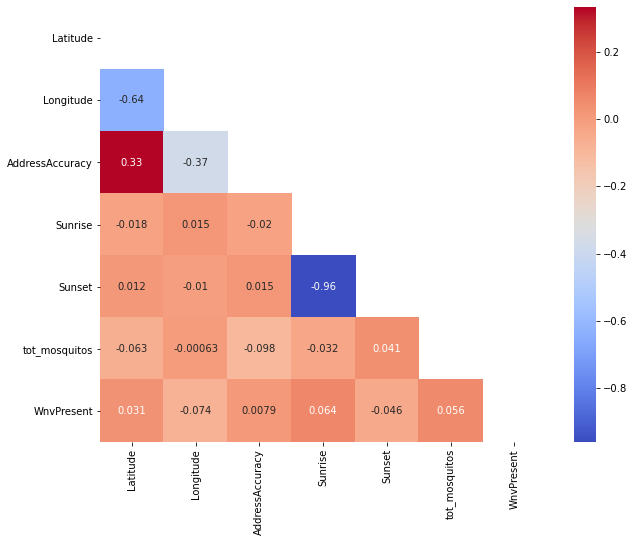

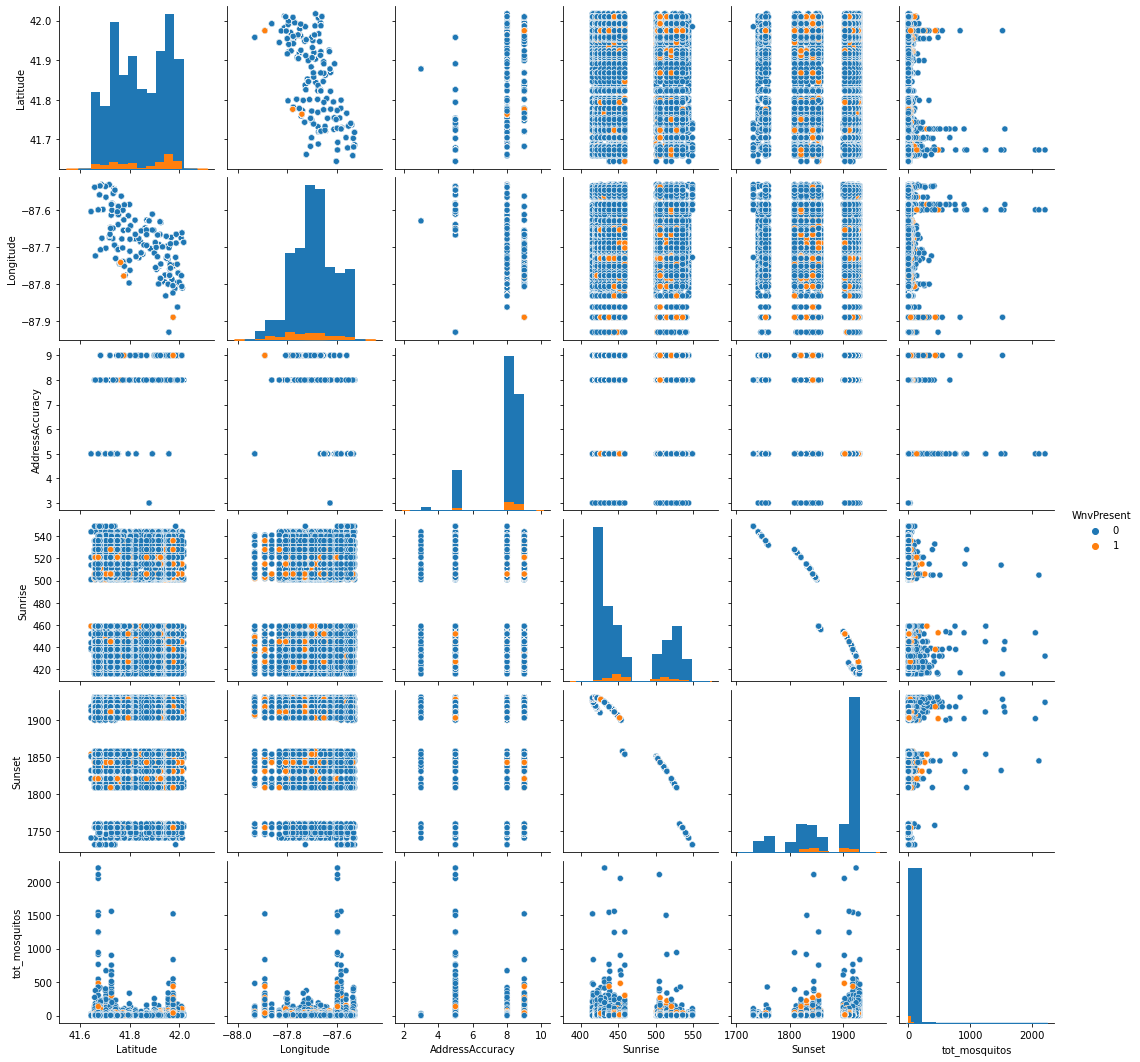

In [ ]:
eda(X[locations],tot_mosquitos,wnv)

AddressAccuracy is quite a meaningless features here and should be dropped. Sunrise and Sunset are very much correlated (> 0.7). We choose Sunrise over Sunset

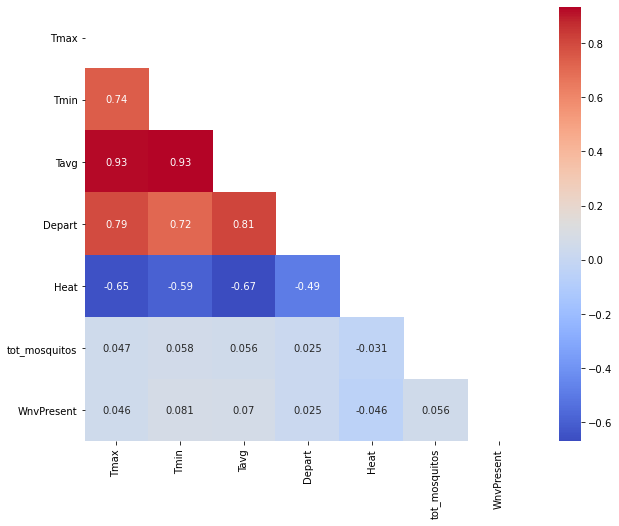

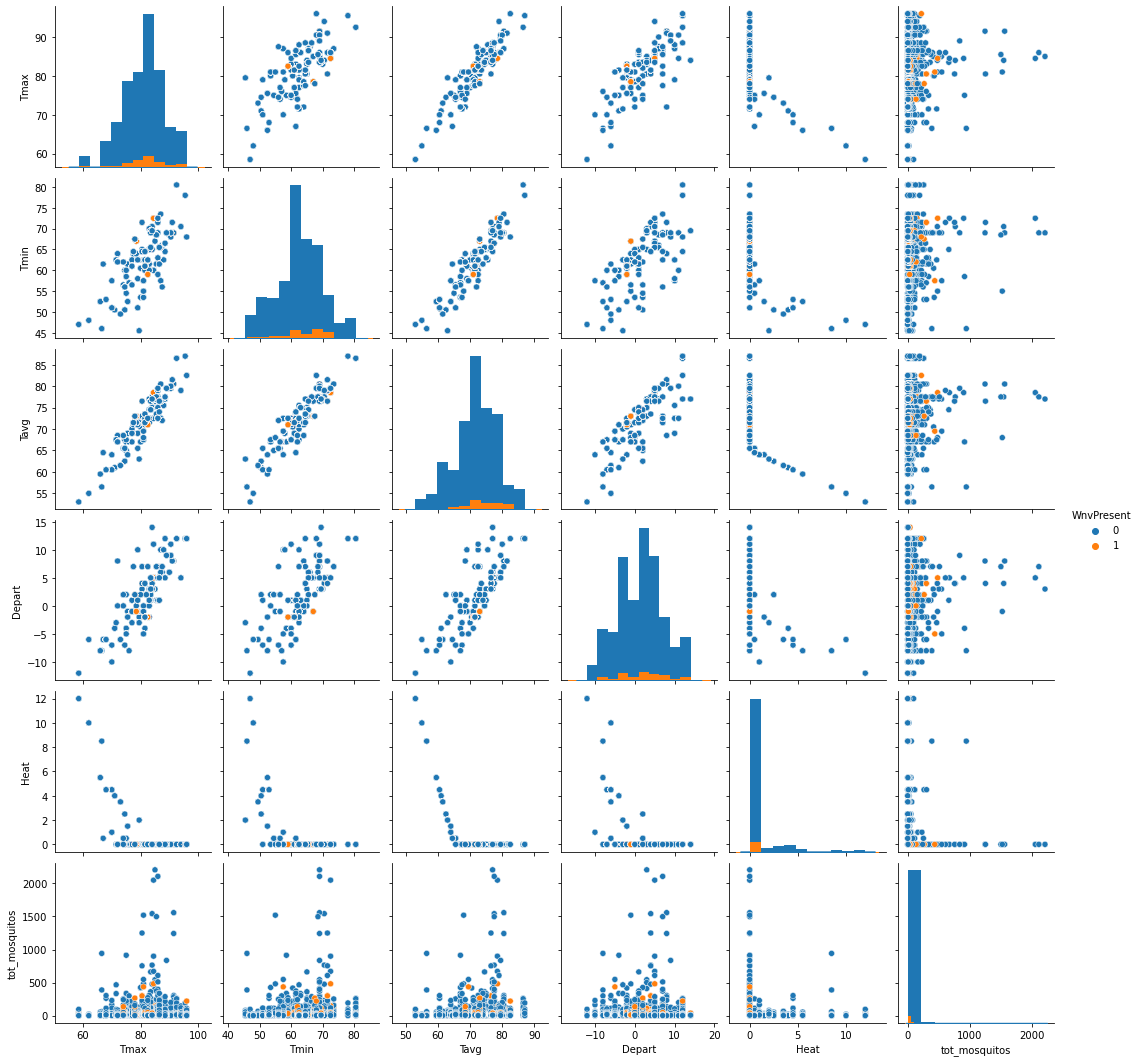

In [ ]:
eda(X[temperature],tot_mosquitos,wnv)

Tmax, Tmin, Tavg, Heat and Depart are very correlated with one another (> 0.7). We will choose Tavg out of these.

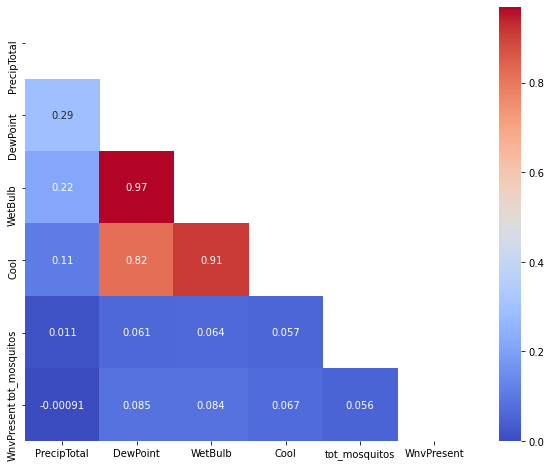

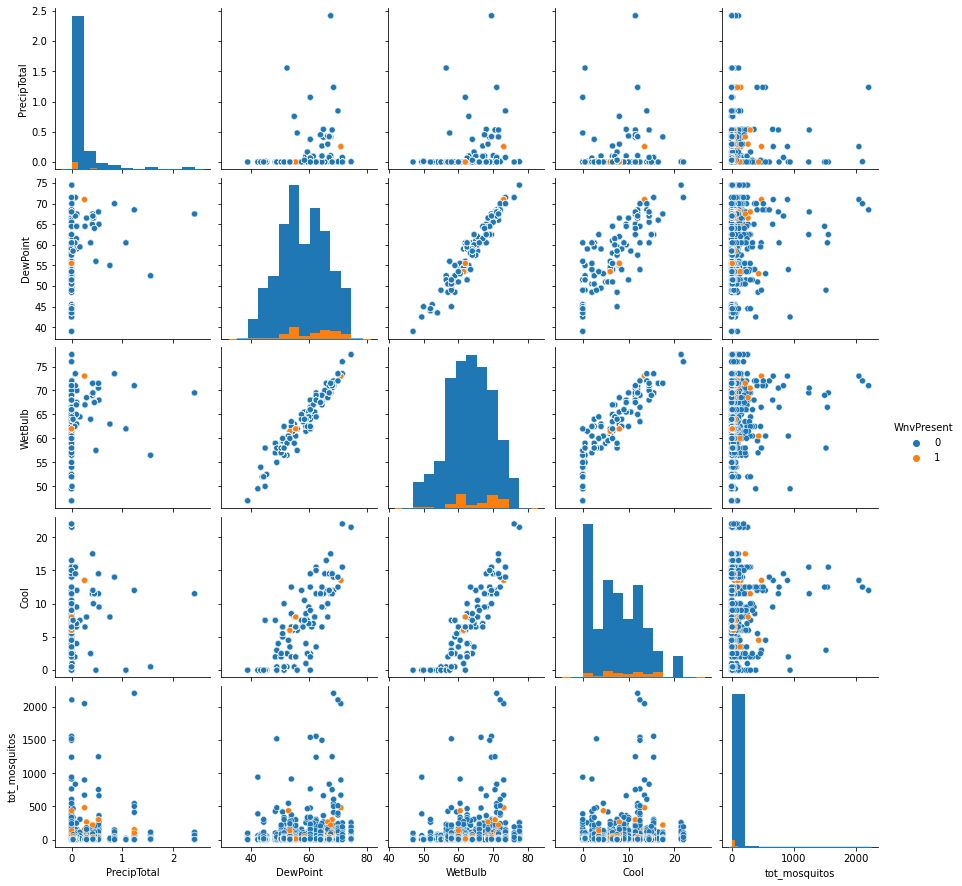

In [ ]:
eda(X[water],tot_mosquitos,wnv)

DewPoint, Wetbulb, Cool are very correlated with one another (> 0.7). We will choose DewPoint out of these as it have the best correlation with tot_mosquitoes and Wnv.

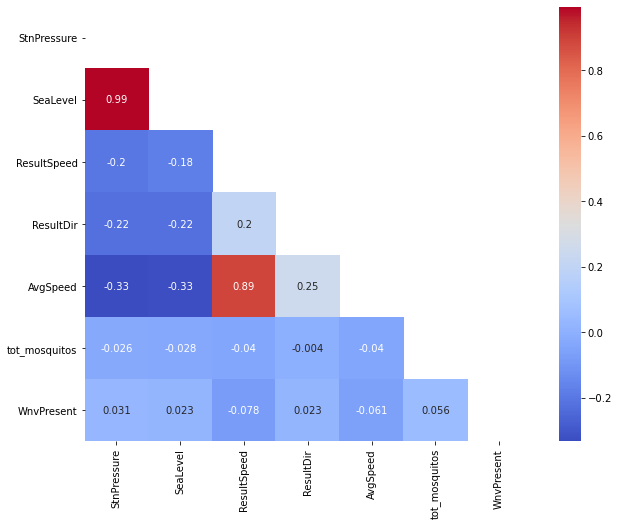

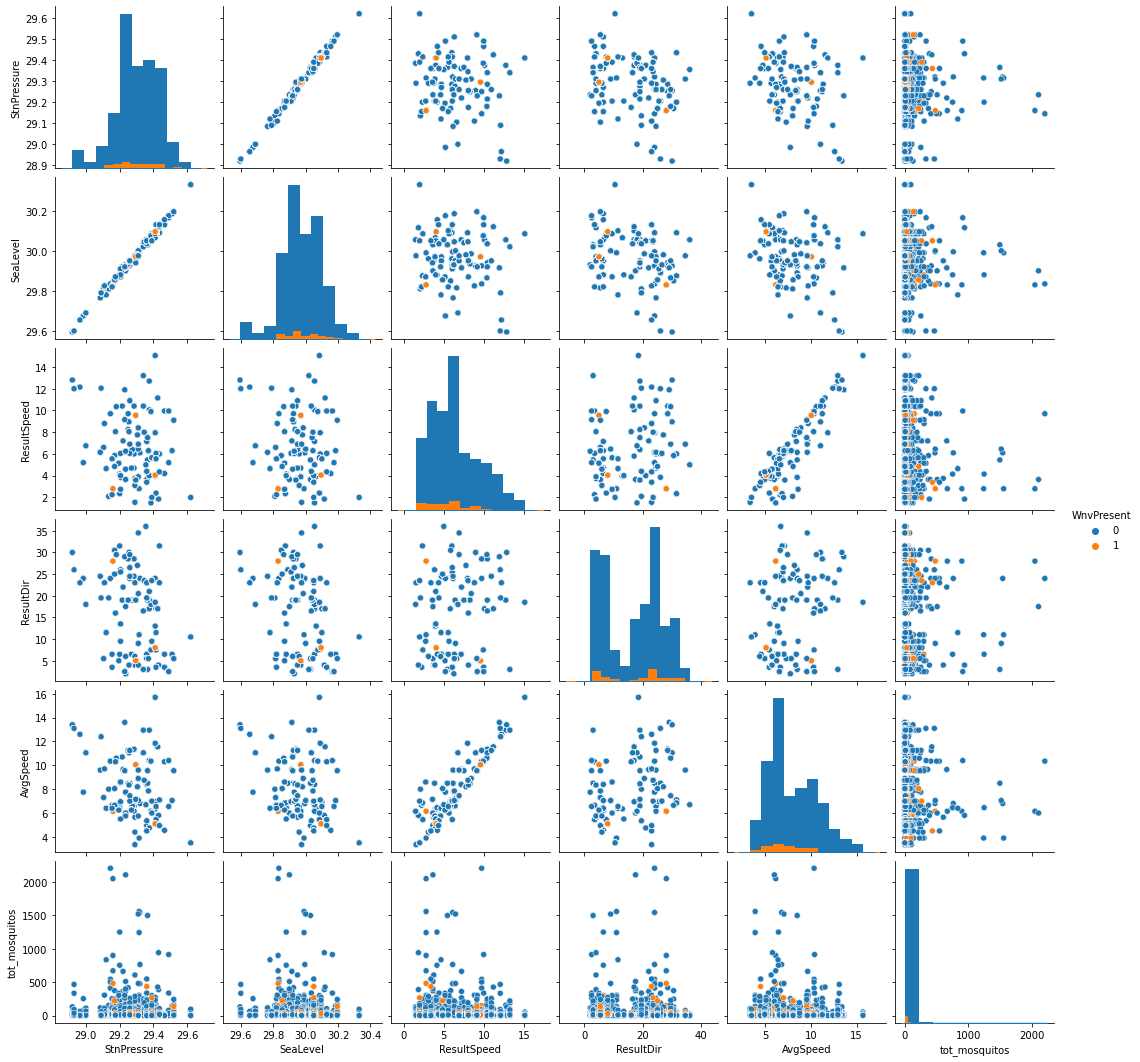

In [ ]:
eda(X[wind],tot_mosquitos,wnv)

StnPressure, SeaLevel are very correlated with one another (> 0.7). We will choose StnPressure. Similarly Resultspeed and AvgSpeed are correlated and we choose ResultSpeed

##### Remaining Features from Weather Dataset

In [ ]:
X = X.drop(columns = ['AddressAccuracy','Sunset','Tmax','Tmin','Depart','WetBulb','Heat','Cool','SeaLevel','AvgSpeed'])

In [ ]:
X.columns

Index(['Latitude', 'Longitude', 'pipiens/restuans', 'restuans', 'pipiens',
       'salinarius', 'territans', 'tarsalis', 'erraticus', 'unspecified',
       ...
       'T090B', 'T200B', 'T090A', 'Tavg', 'DewPoint', 'Sunrise', 'PrecipTotal',
       'StnPressure', 'ResultSpeed', 'ResultDir'],
      dtype='object', length=175)

#### Train Dataset Features

In [ ]:
# % of traps with wnv by time period
df_wnv_per = df.groupby(["year", "month"], as_index=False).agg(traps_wnv = ("WnvPresent", "sum"), 
                                                                            tot_traps = ("Trap", "count"))

df_wnv_per["per_trap_wnv"] = round((df_wnv_per["traps_wnv"] / df_wnv_per["tot_traps"]) * 100, 2)

In [ ]:
# function for plotting line graph 
def plot_line(dataframe, variables, labels, title, n, palette):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(18, 6))
    sns.lineplot(variables[0], variables[1], data=dataframe, hue=variables[2], estimator=None, palette=palette)
    plt.xticks(rotation=n)
    plt.xlabel(labels[0], fontsize=12)
    plt.ylabel(labels[1], fontsize=12)
    plt.suptitle(title, fontsize=15)
    
    return plt.show()

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


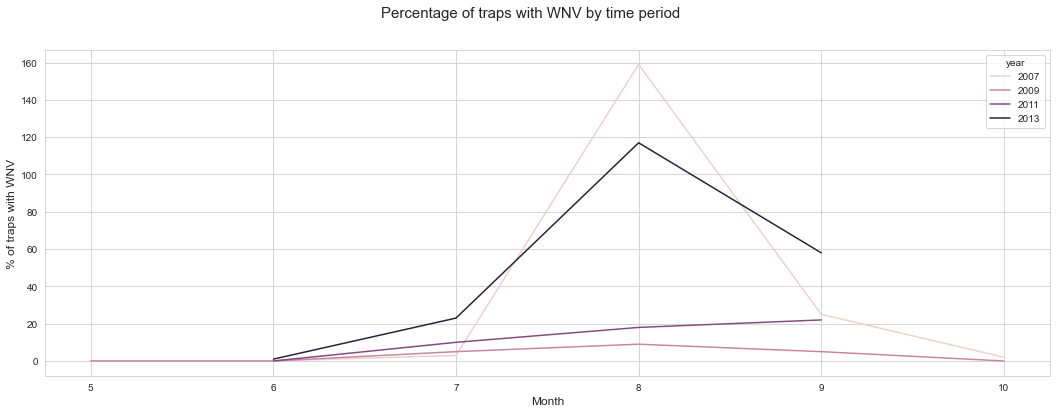

In [ ]:
dataframe = df_wnv_per
variables = ["month", "traps_wnv", "year"]
labels = ["Month", "% of traps with WNV"]
title = "Percentage of traps with WNV by time period"
plot_line(dataframe, variables, labels, title, 0, None)

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


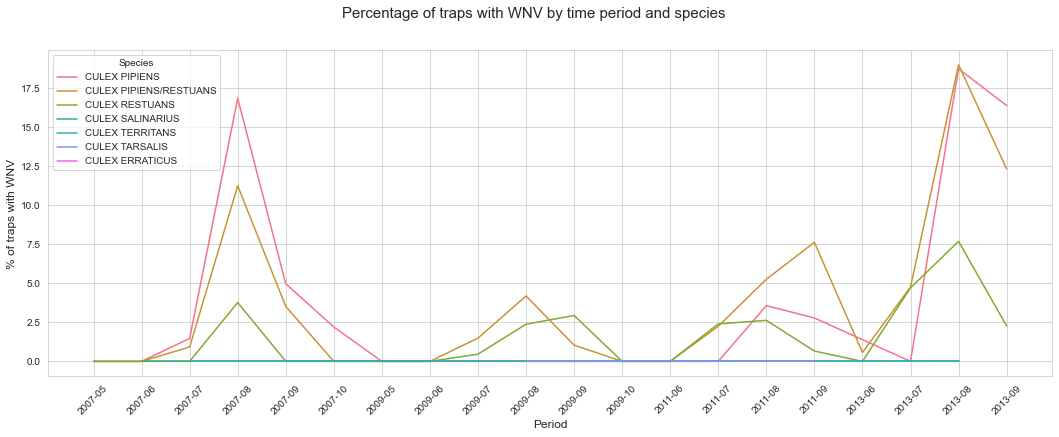

In [ ]:
# % of traps with wnv by period and species
df_species_wnv = df.groupby(["month_year", "Species"], as_index=False).\
agg(traps_wnv = ("WnvPresent", "sum"), 
    tot_traps = ("Trap", "count"))

df_species_wnv["per_trap_wnv"] = round((df_species_wnv["traps_wnv"] / df_species_wnv["tot_traps"]) * 100, 2)

dataframe = df_species_wnv
variables = ["month_year", "per_trap_wnv", "Species"]
labels = ["Period", "% of traps with WNV"]
title = "Percentage of traps with WNV by time period and species"
plot_line(dataframe, variables, labels, title, 45, "husl")

August seems to be the peak period for the WNV cases to spread. During this month, a higher percentage of traps are found to have mosquitos carrying WNV compared to other months. This can be observed across all species of mosquitos.

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


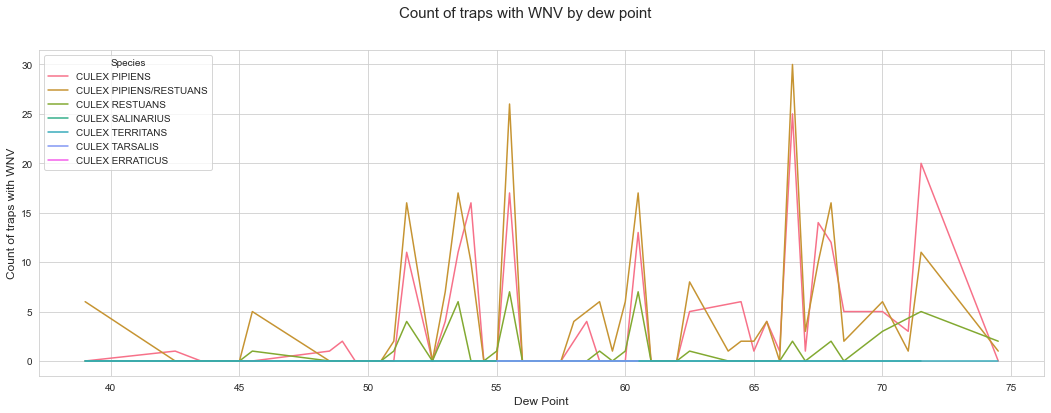

In [ ]:
df_dew_wnv = df.groupby(["DewPoint", "Species"], as_index=False).\
agg(traps_wnv = ("WnvPresent", "sum"), 
    tot_traps = ("Trap", "count"))
df_dew_wnv["per_trap_wnv"] = round((df_dew_wnv["traps_wnv"] / df_dew_wnv["tot_traps"]) * 100, 2)

dataframe = df_dew_wnv
variables = ["DewPoint", "traps_wnv", "Species"]
labels = ["Dew Point", "Count of traps with WNV"]
title = "Count of traps with WNV by dew point"
plot_line(dataframe, variables, labels, title, 0, "husl")

At dewpoint around 51+ onwards, there are more fluctuations in the count of traps with WNV. More traps with WNV are found.

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


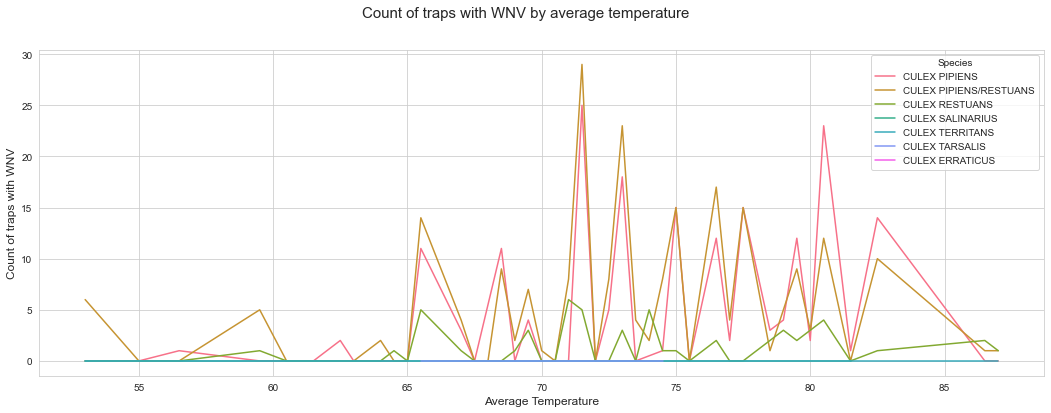

In [ ]:
df_temp_wnv = df.groupby(["Tavg", "Species"], as_index=False).\
agg(traps_wnv = ("WnvPresent", "sum"), 
    tot_traps = ("Trap", "count"))
df_temp_wnv["per_trap_wnv"] = round((df_dew_wnv["traps_wnv"] / df_dew_wnv["tot_traps"]) * 100, 2)

dataframe = df_temp_wnv
variables = ["Tavg", "traps_wnv", "Species"]
labels = ["Average Temperature", "Count of traps with WNV"]
title = "Count of traps with WNV by average temperature"
plot_line(dataframe, variables, labels, title, 0, "husl")

Similarly, at average temperature above 65, there are more fluctuations in the count of traps with WNV. More WNV cases are found at higher average temperature.

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


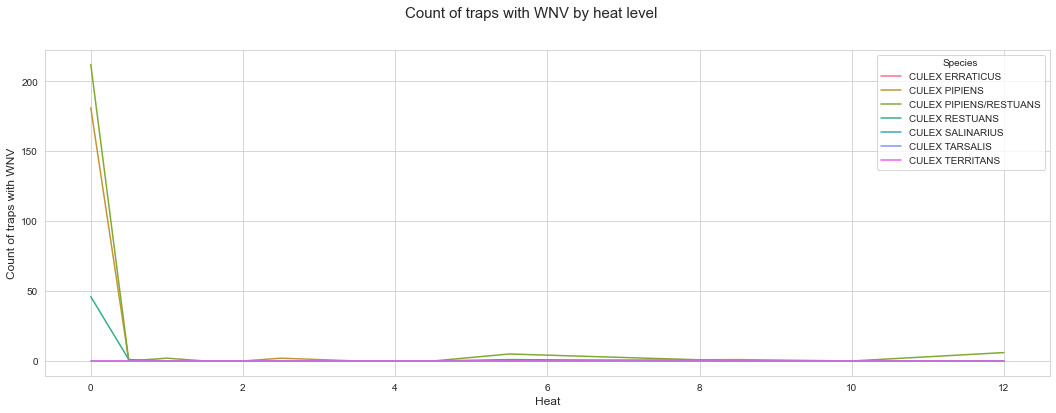

In [ ]:
df_heat_wnv = df.groupby(["Heat", "Species"], as_index=False).\
agg(traps_wnv = ("WnvPresent", "sum"), 
    tot_traps = ("Trap", "count"))
df_heat_wnv["per_trap_wnv"] = round((df_heat_wnv["traps_wnv"] / df_heat_wnv["tot_traps"]) * 100, 2)

dataframe = df_heat_wnv
variables = ["Heat", "traps_wnv", "Species"]
labels = ["Heat", "Count of traps with WNV"]
title = "Count of traps with WNV by heat level"
plot_line(dataframe, variables, labels, title, 0, "husl")

Number of traps with WNV is the highest when the heat level is at 0.

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


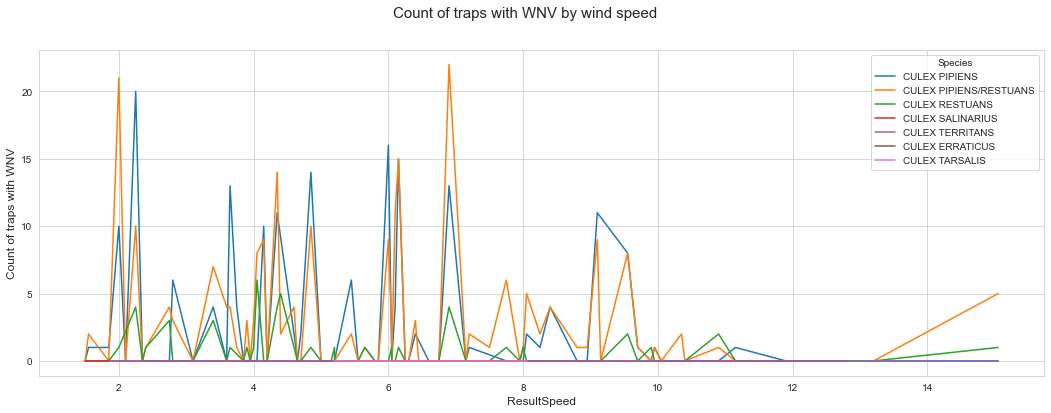

In [ ]:
df_speed_wnv = df.groupby(["ResultSpeed", "Species"], as_index=False).\
agg(traps_wnv = ("WnvPresent", "sum"), 
    tot_traps = ("Trap", "count"))
df_speed_wnv["per_trap_wnv"] = round((df_speed_wnv["traps_wnv"] / df_speed_wnv["tot_traps"]) * 100, 2)

dataframe = df_speed_wnv
variables = ["ResultSpeed", "traps_wnv", "Species"]
labels = ["ResultSpeed", "Count of traps with WNV"]
title = "Count of traps with WNV by wind speed"
plot_line(dataframe, variables, labels, title, 0, None)

As the wind speed increases, the number of traps with WNV drops.

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


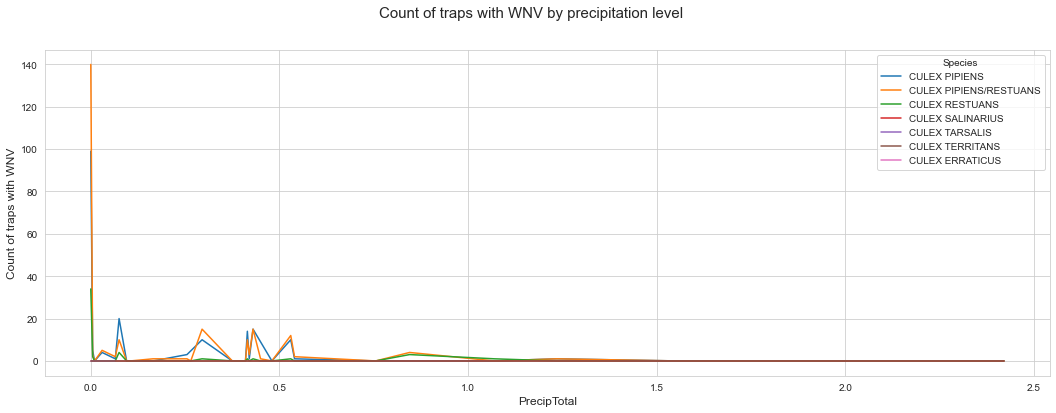

In [ ]:
df_precip_wnv = df.groupby(["PrecipTotal", "Species"], as_index=False).\
agg(traps_wnv = ("WnvPresent", "sum"), 
    tot_traps = ("Trap", "count"))
df_precip_wnv["per_trap_wnv"] = round((df_precip_wnv["traps_wnv"] / df_precip_wnv["tot_traps"]) * 100, 2)

dataframe = df_precip_wnv
variables = ["PrecipTotal", "traps_wnv", "Species"]
labels = ["PrecipTotal", "Count of traps with WNV"]
title = "Count of traps with WNV by precipitation level"
plot_line(dataframe, variables, labels, title, 0, None)

Number of traps with WNV seems to be the highest when the total precipitation level is measured at 0.

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


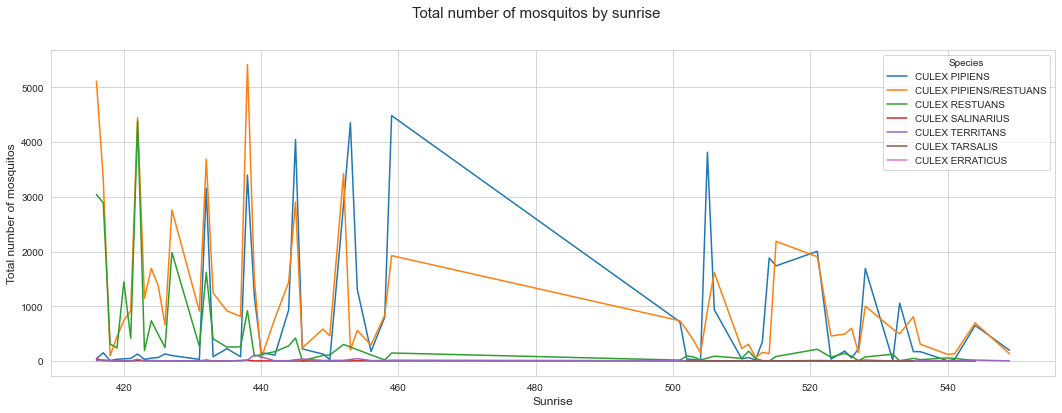

In [ ]:
df_sunrise_wnv = df.groupby(["Sunrise", "Species"], as_index=False).\
agg(traps_wnv = ("WnvPresent", "sum"), 
    tot_traps = ("Trap", "count"), 
    tot_all_mosquitos = ("tot_mosquitos", "sum"))
df_sunrise_wnv["per_trap_wnv"] = round((df_sunrise_wnv["traps_wnv"] / df_sunrise_wnv["tot_traps"]) * 100, 2)

dataframe = df_sunrise_wnv
variables = ["Sunrise", "tot_all_mosquitos", "Species"]
labels = ["Sunrise", "Total number of mosquitos"]
title = "Total number of mosquitos by sunrise"
plot_line(dataframe, variables, labels, title, 0, None)

There seems to be fewer mosquitos as it approaches sunrise.

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


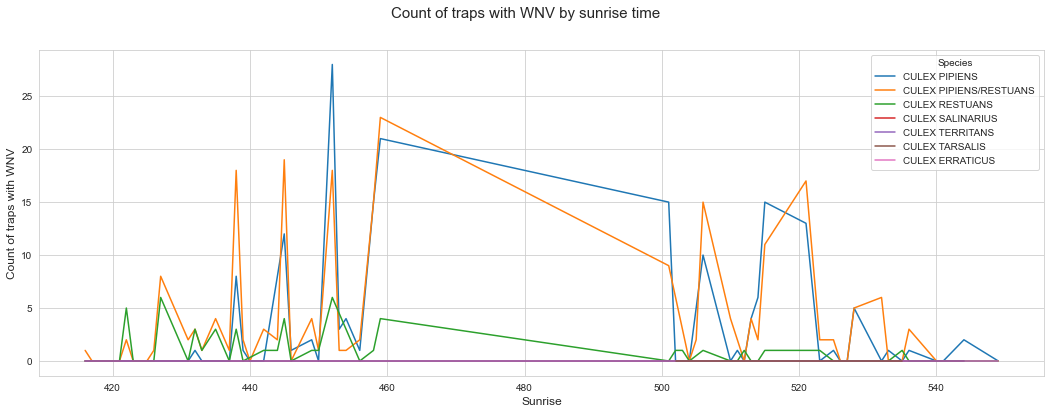

In [ ]:
dataframe = df_sunrise_wnv
variables = ["Sunrise", "traps_wnv", "Species"]
labels = ["Sunrise", "Count of traps with WNV"]
title = "Count of traps with WNV by sunrise time"
plot_line(dataframe, variables, labels, title, 0, None)

In [ ]:
df_sunset_wnv = df.groupby(["Sunset", "Species"], as_index=False).\
agg(traps_wnv = ("WnvPresent", "sum"), 
    tot_traps = ("Trap", "count"), 
    tot_all_mosquitos = ("tot_mosquitos", "sum"))
df_sunset_wnv["per_trap_wnv"] = round((df_sunset_wnv["traps_wnv"] / df_sunset_wnv["tot_traps"]) * 100, 2)

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


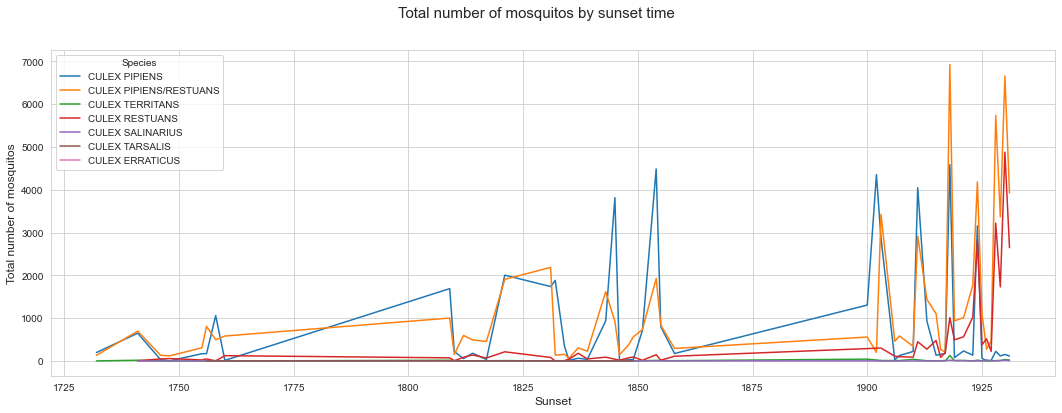

In [ ]:
dataframe = df_sunset_wnv
variables = ["Sunset", "tot_all_mosquitos", "Species"]
labels = ["Sunset", "Total number of mosquitos"]
title = "Total number of mosquitos by sunset time"
plot_line(dataframe, variables, labels, title, 0, None)

There seems to be more mosquitos as it approaches sunset and night falls.

C:\Users\nk23d\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


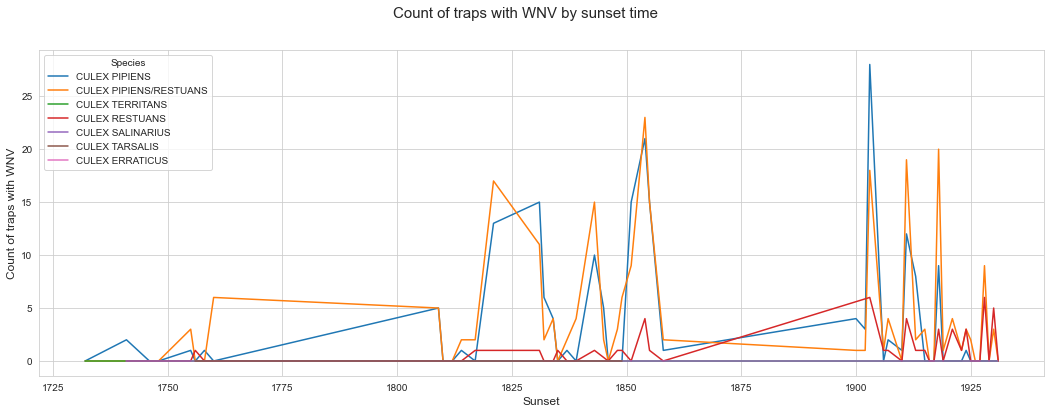

In [ ]:
dataframe = df_sunset_wnv
variables = ["Sunset", "traps_wnv", "Species"]
labels = ["Sunset", "Count of traps with WNV"]
title = "Count of traps with WNV by sunset time"
plot_line(dataframe, variables, labels, title, 0, None)

In [ ]:
variables = ["WnvPresent", "pipiens/restuans", "pipiens", "restuans",
             "salinarius", "territans", "tarsalis", "erraticus",
             "Tmax", "Tmin", "Tavg", "Depart", 
             "DewPoint", "WetBulb", "Heat", "Cool",
             "Sunrise", "Sunset", "PrecipTotal", "StnPressure", 
             "SeaLevel", "ResultSpeed", "ResultDir", "AvgSpeed", 
             "6", "7", "8", "9", "10", "tot_mosquitos"]

# create a function to plot heatmap
def plot_heatmap(dataframe, variables, title):
    fig, ax = plt.subplots(figsize=(40, 25))
    mask = np.zeros_like(dataframe[variables].corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(dataframe[variables].corr(), 
                cmap="PiYG",
                linewidths=0.2,
                vmin=-1,
                vmax=1,
                mask=mask, 
                square=True, 
                annot=True, 
                cbar_kws={
                    "orientation": "horizontal", 
                    "label": "Correlation", 
                    "shrink": 0.4, 
                    "aspect": 30})
    plt.title(title, fontweight="bold", fontsize=20)
    
    return plt.show()

<ipython-input-32-d10e3df71d4c>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dataframe[variables].corr(), dtype=np.bool)


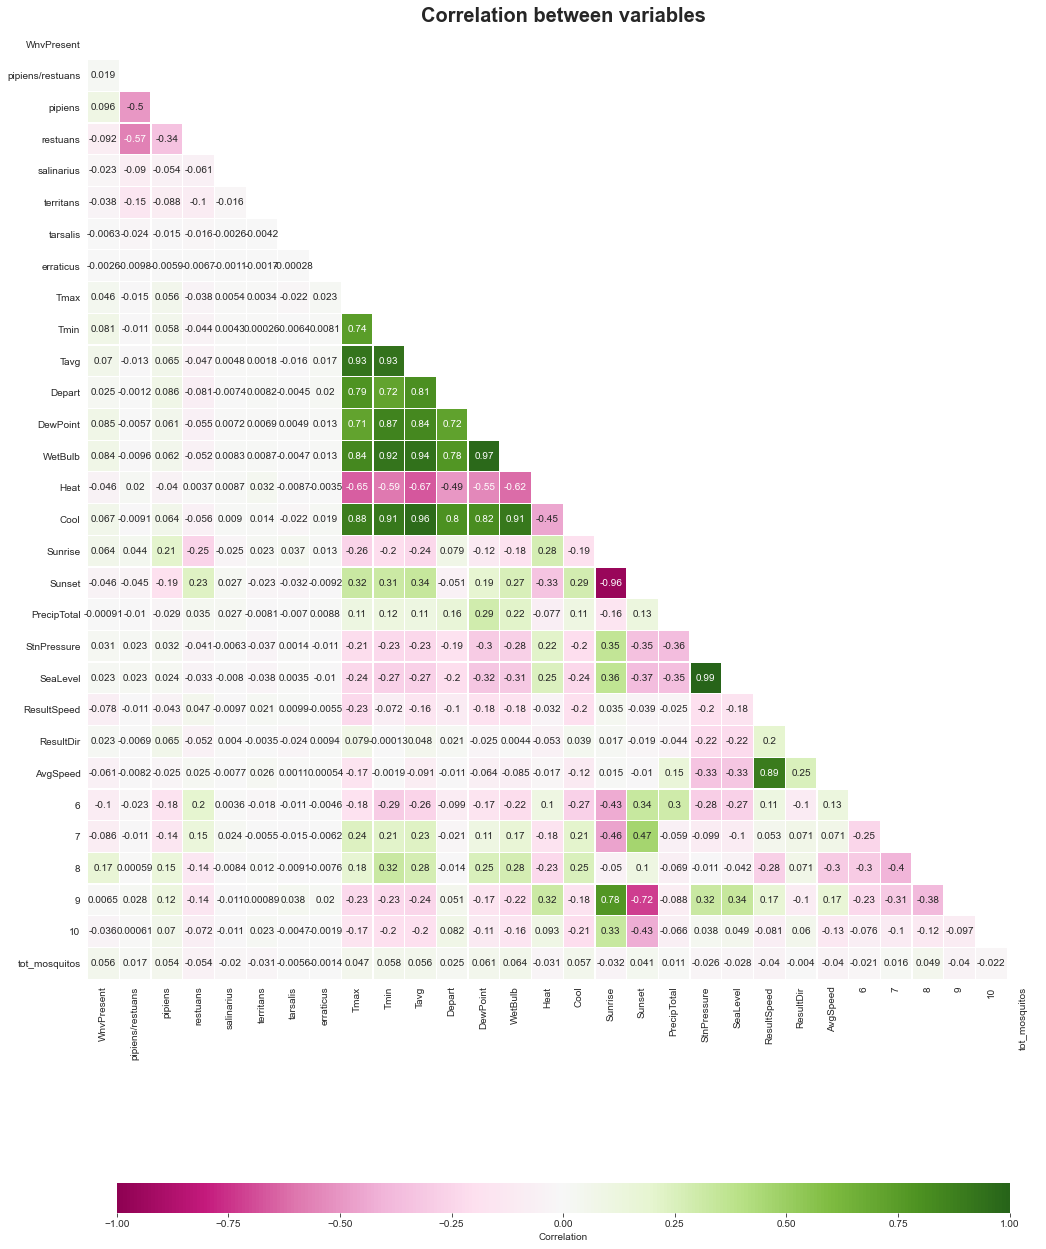

In [ ]:
plot_heatmap(df, variables, "Correlation between variables")

In [ ]:
all_traps = df.groupby(["Trap"], as_index=False).\
agg(tot_all_mosquitos = ("tot_mosquitos", "sum"), 
    traps_wnv=("WnvPresent", "sum"), 
    traps_count=("Trap", "count"))

bins = np.linspace(all_traps["tot_all_mosquitos"].min(), all_traps["tot_all_mosquitos"].max(), 20)
all_traps['bins'] = pd.cut(all_traps['tot_all_mosquitos'], bins=bins)
all_traps_bins = all_traps.groupby(["bins"], as_index=False).agg(wnv_cases = ("traps_wnv", "sum"))

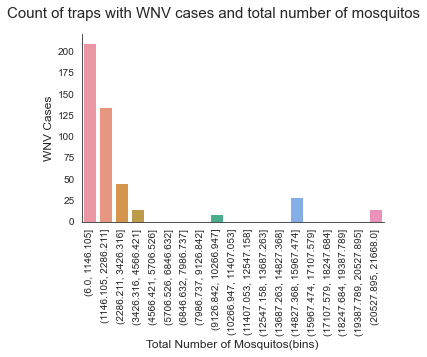

In [ ]:
# plot for count of traps with WNV cases and total number of mosquitos(bins)
sns.set_style("white")
sns.catplot(x="bins", y="wnv_cases", data=all_traps_bins, kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Total Number of Mosquitos(bins)", fontsize=12)
plt.ylabel("WNV Cases", fontsize=12)
plt.suptitle("Count of traps with WNV cases and total number of mosquitos", fontsize=15)
plt.tight_layout(pad=1)

plt.show()

There seems to be very little correlation between the number of WNV cases and the total number of mosquitos. 